In [393]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import numpy as np

In [394]:
image = mpimg.imread('test.jpg')
type(image), image.shape

(numpy.ndarray, (540, 960, 3))

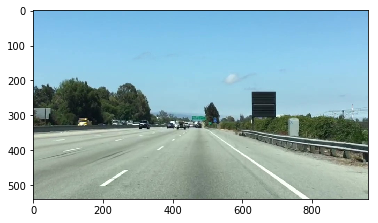

In [395]:
plt.imshow(image)

In [396]:
image[:, :, 0].shape

(540, 960)

In [397]:
image

array([[[122, 185, 229],
        [122, 185, 229],
        [123, 186, 230],
        ...,
        [123, 184, 229],
        [123, 184, 229],
        [123, 184, 229]],

       [[122, 185, 229],
        [122, 185, 229],
        [122, 185, 229],
        ...,
        [123, 184, 229],
        [123, 184, 229],
        [123, 184, 229]],

       [[122, 185, 229],
        [122, 185, 229],
        [122, 185, 229],
        ...,
        [123, 184, 229],
        [123, 184, 229],
        [123, 184, 229]],

       ...,

       [[154, 166, 154],
        [156, 168, 156],
        [153, 165, 153],
        ...,
        [180, 197, 181],
        [181, 198, 182],
        [181, 198, 182]],

       [[162, 174, 164],
        [160, 172, 162],
        [152, 164, 154],
        ...,
        [174, 192, 176],
        [175, 193, 177],
        [176, 194, 178]],

       [[156, 168, 158],
        [148, 160, 150],
        [137, 149, 139],
        ...,
        [161, 179, 163],
        [162, 180, 164],
        [162, 180, 164]]

In [398]:
image[:, :, 0]

array([[122, 122, 123, ..., 123, 123, 123],
       [122, 122, 122, ..., 123, 123, 123],
       [122, 122, 122, ..., 123, 123, 123],
       ...,
       [154, 156, 153, ..., 180, 181, 181],
       [162, 160, 152, ..., 174, 175, 176],
       [156, 148, 137, ..., 161, 162, 162]], dtype=uint8)

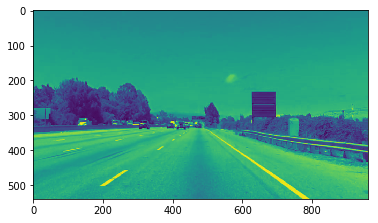

In [399]:
plt.imshow(image[:, :, 0])

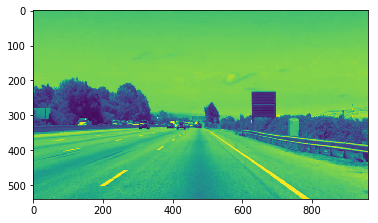

In [400]:
plt.imshow(image[:, :, 1])

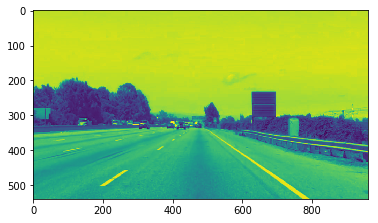

In [401]:
plt.imshow(image[:, :, 2])

In [402]:
ysize = image.shape[0]
xsize = image.shape[1]

### Re-run  from here if changing code below

## Color Selection

In [403]:
color_select = np.copy(image)

In [404]:
color_select is image

False

In [405]:
color_select

array([[[122, 185, 229],
        [122, 185, 229],
        [123, 186, 230],
        ...,
        [123, 184, 229],
        [123, 184, 229],
        [123, 184, 229]],

       [[122, 185, 229],
        [122, 185, 229],
        [122, 185, 229],
        ...,
        [123, 184, 229],
        [123, 184, 229],
        [123, 184, 229]],

       [[122, 185, 229],
        [122, 185, 229],
        [122, 185, 229],
        ...,
        [123, 184, 229],
        [123, 184, 229],
        [123, 184, 229]],

       ...,

       [[154, 166, 154],
        [156, 168, 156],
        [153, 165, 153],
        ...,
        [180, 197, 181],
        [181, 198, 182],
        [181, 198, 182]],

       [[162, 174, 164],
        [160, 172, 162],
        [152, 164, 154],
        ...,
        [174, 192, 176],
        [175, 193, 177],
        [176, 194, 178]],

       [[156, 168, 158],
        [148, 160, 150],
        [137, 149, 139],
        ...,
        [161, 179, 163],
        [162, 180, 164],
        [162, 180, 164]]

In [406]:
# red_threshold = 0
# green_threshold = 0
# blue_threshold = 0

# red_threshold = 50
# green_threshold = 50
# blue_threshold = 50

# red_threshold = 100
# green_threshold = 100
# blue_threshold = 100

# red_threshold = 150
# green_threshold = 150
# blue_threshold = 150

red_threshold = 200
green_threshold = 200
blue_threshold = 200

# red_threshold = 255
# green_threshold = 255
# blue_threshold = 255

rgb_threshold = [red_threshold, green_threshold, blue_threshold]
rgb_threshold

[200, 200, 200]

In [407]:
color_thresholds = (
    (image[:, :, 0] < rgb_threshold[0]) 
    | (image[:, :, 1] < rgb_threshold[1]) 
    | (image[:, :, 2] < rgb_threshold[2])
)
color_thresholds.shape

(540, 960)

In [408]:
color_thresholds

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

## Region Masking

In [409]:
region_select = np.copy(image)

In [410]:
# left_bottom = [0, 539]
# right_bottom = [900, 300]
# apex = [400, 0]

left_bottom = [0, 539]
right_bottom = [959, 539]
apex = [470, 330]

In [411]:
fit_left = np.polyfit([left_bottom[0], apex[0]], [left_bottom[1], apex[1]], 1)
fit_right = np.polyfit([right_bottom[0], apex[0]], [right_bottom[1], apex[1]], 1)
fit_bottom = np.polyfit([left_bottom[0], right_bottom[0]], [left_bottom[1], right_bottom[1]], 1)

In [412]:
fit_left

array([-4.44680851e-01,  5.39000000e+02])

In [413]:
fit_right

array([  0.42740286, 129.1206544 ])

In [414]:
fit_bottom

array([-5.9273638e-17,  5.3900000e+02])

In [415]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

In [416]:
XX.shape, YY.shape

((540, 960), (540, 960))

In [417]:
XX

array([[  0,   1,   2, ..., 957, 958, 959],
       [  0,   1,   2, ..., 957, 958, 959],
       [  0,   1,   2, ..., 957, 958, 959],
       ...,
       [  0,   1,   2, ..., 957, 958, 959],
       [  0,   1,   2, ..., 957, 958, 959],
       [  0,   1,   2, ..., 957, 958, 959]])

In [418]:
YY

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [537, 537, 537, ..., 537, 537, 537],
       [538, 538, 538, ..., 538, 538, 538],
       [539, 539, 539, ..., 539, 539, 539]])

In [419]:
result = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

In [420]:
result

[array([[  0,   1,   2, ..., 957, 958, 959],
        [  0,   1,   2, ..., 957, 958, 959],
        [  0,   1,   2, ..., 957, 958, 959],
        ...,
        [  0,   1,   2, ..., 957, 958, 959],
        [  0,   1,   2, ..., 957, 958, 959],
        [  0,   1,   2, ..., 957, 958, 959]]),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  1,   1,   1, ...,   1,   1,   1],
        [  2,   2,   2, ...,   2,   2,   2],
        ...,
        [537, 537, 537, ..., 537, 537, 537],
        [538, 538, 538, ..., 538, 538, 538],
        [539, 539, 539, ..., 539, 539, 539]])]

In [421]:
region_thresholds = (
    (YY > (fit_left[0] * XX + fit_left[1])) 
    & (YY < (fit_bottom[0] * XX + fit_bottom[1]))
    & (YY > (fit_right[0] * XX + fit_right[1]))
)
region_thresholds.shape

(540, 960)

In [422]:
region_thresholds

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## Process Image

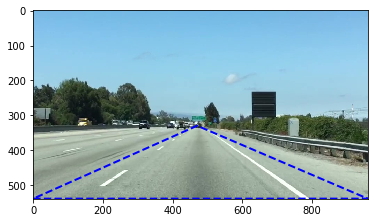

In [423]:
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=2)

In [424]:
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]

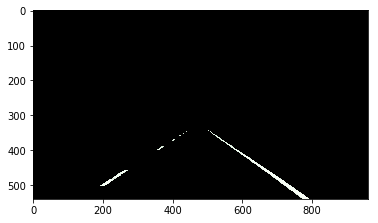

In [425]:
plt.imshow(color_select)

In [426]:
line_image = np.copy(image)

In [427]:
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

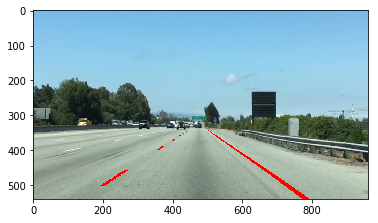

In [428]:
plt.imshow(line_image)